First I am going to import all the required libraries 

In [ ]:
import pandas as pd

'\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error, r2_score\n'

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
import seaborn as sns

For computational constraints i am restricting myself to 10k rows for training and predictions

In [ ]:
train_df = pd.read_csv("C:/Users/Aranganathan/Downloads/train_data.csv").head(10000)
test_df = pd.read_csv("C:/Users/Aranganathan/Downloads/test_data.csv").head(10000)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

train_df.head()


Train shape: (10000, 3)
Test shape: (10000, 2)


,w,x,y
0,-2.5,-2.784390,0.596025
1,-2.5,-2.308732,-0.449801
2,-2.5,-3.869936,-0.301154
3,-2.5,-2.671678,0.399640
4,-2.5,6.609344,0.700448


In [20]:
test_df.head()

,w,x
0,-2.5,-20.640539
1,-2.5,21.636451
2,-2.5,-16.856414
3,-2.5,89.961916
4,-2.5,13.535599


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   w       10000 non-null  float64
 1   x       10000 non-null  float64
 2   y       10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB
None
             w             x             y
count  10000.0  10000.000000  10000.000000
mean      -2.5      0.036874     -0.002395
std        0.0      5.778896      0.715321
min       -2.5     -9.999716     -1.165703
25%       -2.5     -4.924652     -0.713947
50%       -2.5      0.082464     -0.000516
75%       -2.5      5.061387      0.719530
max       -2.5      9.999878      1.152742


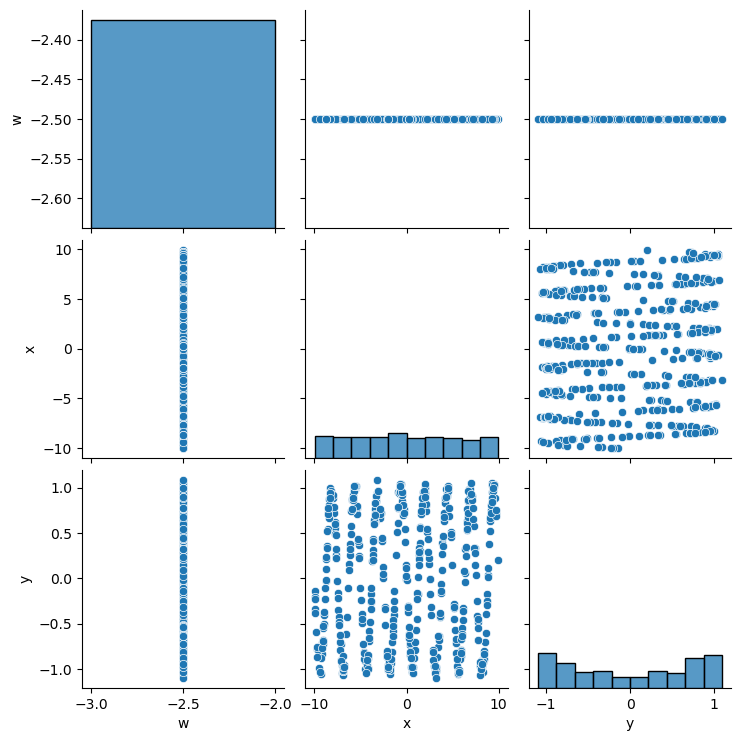

In [ ]:
print(train_df.info())
print(train_df.describe())

sns.pairplot(train_df.sample(500)) 
plt.show()


The plot shows that the output values are kind of centred around 0

w is mostly constant, x is nicely spread between -10 and 1, i am dropping  because it seems useless for predictions coz its anyways constant

In [50]:
features = ['x']
target = 'y'
X_train = train_df[features]
y_train = train_df[target]


In [34]:
X_test = test_df[features]


In [43]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [44]:
y_pred = model.predict(X_test)
test_df['y_pred'] = y_pred

test_df.head()


,w,x,y_pred
0,-2.5,-20.640539,-0.202587
1,-2.5,21.636451,0.206725
2,-2.5,-16.856414,-0.165950
3,-2.5,89.961916,0.868228
4,-2.5,13.535599,0.128295


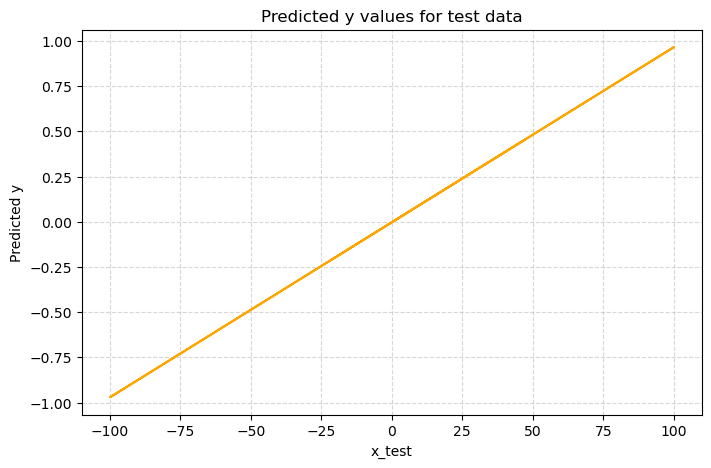

In [47]:
plt.figure(figsize=(8,5))
plt.plot(X_test, y_pred, color='orange', linewidth=1.5)
plt.title("Predicted y values for test data")
plt.xlabel("x_test")
plt.ylabel("Predicted y")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

this means that this is a simple linear function depending on x